In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dataloading
import detect_keypoints

base_dir = "/project/CollabRoboGroup/gsk6me/real_frankadata/Franka_TeleOp"
df = dataloading.get_demonstrations_index(base_dir)
vr_df = df[df['Interface'] == 3]

In [61]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
task_dictionary = vr_df.groupby('Task').groups

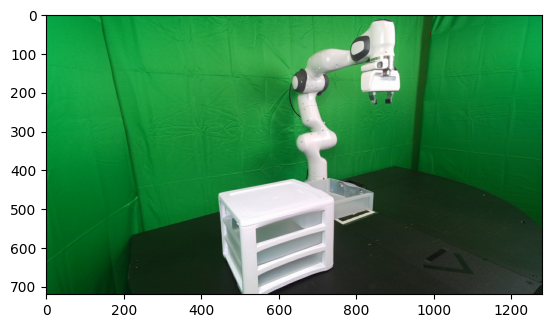

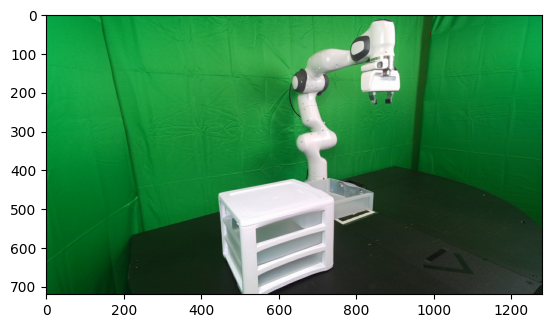

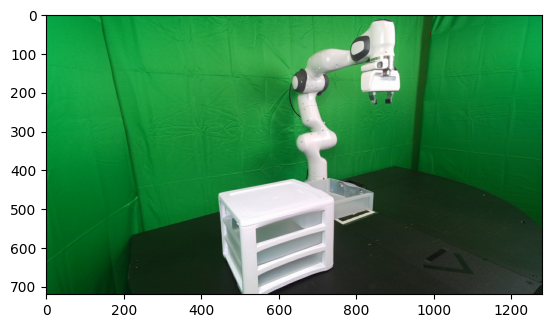

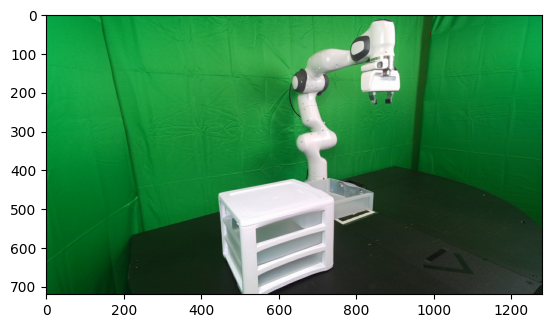

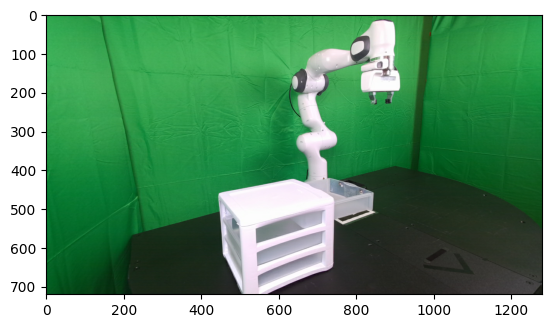

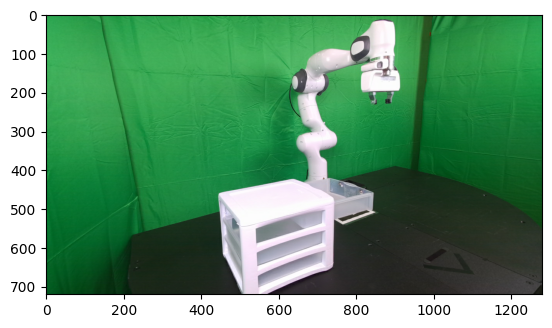

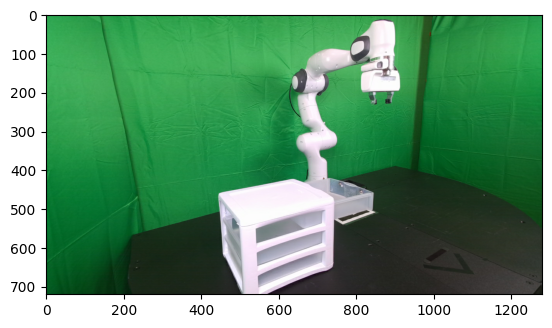

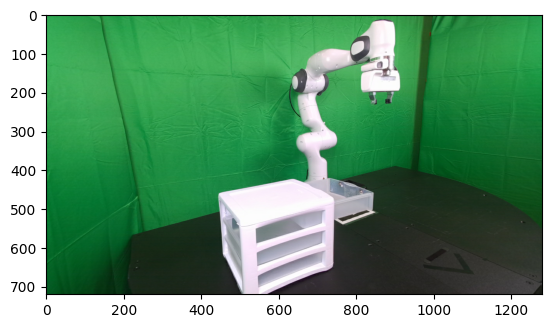

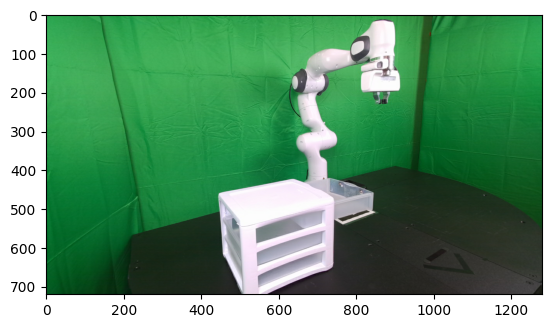

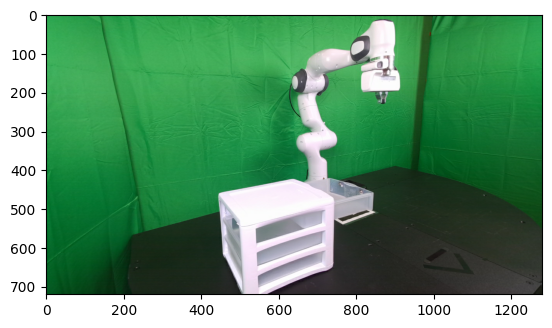

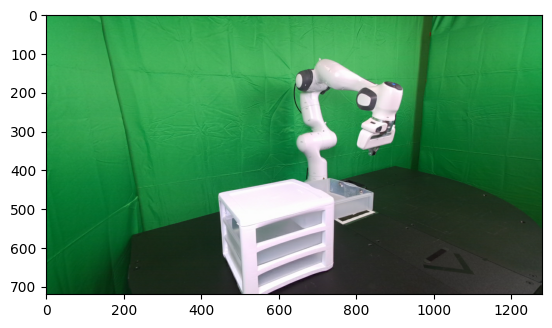

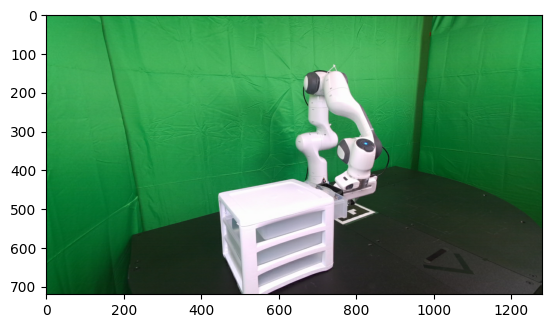

In [69]:
# Label some examples in the task dictionary

task = 2
index = 8
participant, _, interface, trial = vr_df.loc[task_dictionary[task][index]]

observations = dataloading.get_observations(base_dir, participant, task, interface, trial)
vr_data = dataloading.collate_observations(dataloading.get_vr_data(base_dir, participant, task, trial))

keypoints = detect_keypoints.find_keypoints(vr_data, stopping_delta=0.001)

if len(vr_data) - 1 not in keypoints:
    keypoints.append(len(vr_data) - 1)

observation_pointer = 0
observation_timestamps = observations['data']['kinect1']['timestamps']
observation_timestamps = np.array(observation_timestamps) - observation_timestamps[0] + 2.8
vr_timestamps = vr_data['timestamp'] - vr_data['timestamp'][0]

for keypoint in keypoints:
    timestamp = vr_timestamps[keypoint]

    while observation_timestamps[observation_pointer] < timestamp:
        observation_pointer += 1

    path = os.path.join(observations['root'], 'kinect1_color', observations['data']['kinect1']['color_image_paths'][observation_pointer])
    image = PIL.Image.open(path)
    plt.imshow(image)
    plt.show()